以下是对用户查询“这个代码的数学公式，整体逻辑”的详细回答。我将基于代码的数学原理和逻辑流程进行清晰、准确的解释，并使用Markdown格式便于阅读和理解。

---

## 整体逻辑

该代码实现了一种基于代理变量的因果发现方法，旨在检验处理变量 \(X\)（例如培训参与）对结果变量 \(Y\)（例如1978年收入）是否存在因果效应，同时控制未观测混杂变量 \(U\) 的影响（通过代理变量 \(W\)，例如1975年收入）。其核心思想是利用核方法和特征函数来估计和检验条件独立性假设 \(X \perp Y \mid U\)。如果该假设被拒绝，则表明 \(X\) 对 \(Y\) 存在因果效应。

### 主要步骤
1. **数据准备**：从数据集中加载 \(X\)、\(Y\) 和 \(W\)。
2. **核函数计算**：使用径向基函数（RBF）核计算 \(X\) 和 \(W\) 的Gram矩阵。
3. **特征表示**：通过特征函数 \(\phi(Y, t)\) 和权重函数 \(m(X, s)\) 捕捉 \(Y\) 和 \(X\) 的特性。
4. **估计 \(H(W, t)\)**：利用岭回归估计 \(H(W, t)\)，使其逼近 \(\phi(Y, t)\)。
5. **正则化参数选择**：通过交叉验证选择最佳的正则化参数 \(\lambda\)。
6. **统计量计算**：计算残差 \(U\)，并基于此计算统计量 \(T_n(s, t)\) 和 \(\Delta_{\phi, m}\)。
7. **假设检验**：通过Bootstrap方法估计p值，判断是否拒绝零假设 \(X \perp Y \mid U\)。

---

## 数学公式

以下是代码中涉及的关键数学公式及其含义。

### 1. 核函数和Gram矩阵
- **RBF核函数**：  
  \[
  k(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
  \]
  其中 \(\sigma\) 是核的带宽参数，用于衡量样本之间的相似性。
- **Gram矩阵**：  
  \[
  K_X = [k(x_i, x_j)]_{i,j=1}^n, \quad K_W = [k(w_i, w_j)]_{i,j=1}^n
  \]
  \(K_X\) 和 \(K_W\) 分别是 \(X\) 和 \(W\) 的相似性矩阵，维度为 \(n \times n\)，\(n\) 为样本数。

### 2. 特征函数和权重函数
- **特征函数**：  
  \[
  \phi(Y, t) = \exp(it Y), \quad t \in \mathbb{R}
  \]
  这是一个复值函数，用于表示 \(Y\) 的特征，\(i\) 是虚数单位。
- **权重函数**：  
  \[
  m(X, s) = \exp(is X), \quad s \in \mathbb{R}
  \]
  类似地，用于表示 \(X\) 的特征。

### 3. 估计 \(H(W, t)\)
- **目标**：估计函数 \(H(W, t)\) 使得 \(\mathbb{E}[\phi(Y, t) - H(W, t) \mid X] \approx 0\)。  
- **岭回归解**：  
  \[
  \alpha = \left( K_W K_X K_W + \lambda n^2 K_W \right)^{-1} K_W K_X \phi(Y, t)
  \]
  其中 \(\alpha\) 是系数向量，\(\lambda\) 是正则化参数，\(H(W, t) = K_W \alpha\)。  
  该公式通过最小化残差并加入正则化项来估计 \(H(W, t)\)。

### 4. 交叉验证选择 \(\lambda\)
- **残差**：  
  \[
  \Delta_{\text{val}} = \phi(Y_{\text{val}}, t) - H(W_{\text{val}}, t)
  \]
- **评分**：  
  \[
  \text{score} = \frac{1}{n_{\text{val}}} \sum |\Delta_{\text{val}}|^2
  \]
  通过KFold交叉验证，在验证集上选择使残差平方和最小的 \(\lambda\)。

### 5. 统计量 \(T_n(s, t)\)
- **残差**：  
  \[
  U = \phi(Y, t) - \hat{H}(W, t)
  \]
  其中 \(\hat{H}(W, t)\) 是估计得到的 \(H(W, t)\)。
- **统计量**：  
  \[
  T_n(s, t) = \frac{1}{\sqrt{n}} \sum_{i=1}^n U_i \cdot m(X_i, s)
  \]
  这是一个复值统计量，用于衡量残差 \(U\) 与 \(X\) 的加权相关性。

### 6. \(\Delta_{\phi, m}\)
- **定义**：  
  \[
  \Delta_{\phi, m} = \max_{t} \int |T_n(s, t)|^2 \, ds
  \]
  表示对所有 \(t\) 中，\(T_n(s, t)\) 的平方模在 \(s\) 上积分的最大值。
- **数值近似**：  
  \[
  \int |T_n(s, t)|^2 \, ds \approx \sum_{s} |T_n(s, t)|^2 \cdot \Delta s
  \]
  其中 \(\Delta s\) 是 \(s\) 的采样间隔。

### 7. Bootstrap p值
- **观测统计量**：计算 \(\Delta_{\text{obs}} = \Delta_{\phi, m}\)。
- **Bootstrap统计量**：通过重采样数据计算 \(\Delta_{\text{boot}}\)。
- **p值**：  
  \[
  p = \frac{1}{B} \sum_{b=1}^B \mathbb{I}(\Delta_{\text{boot}, b} \geq \Delta_{\text{obs}})
  \]
  其中 \(B\) 是Bootstrap重采样次数（例如1000），\(\mathbb{I}\) 是指示函数。

---

## 逻辑流程

1. **数据加载**：从数据集（例如LaLonde数据集）中读取 \(X\)、\(Y\)、\(W\)。  
2. **参数范围设置**：根据 \(X\) 和 \(Y\) 的标准差动态调整 \(s\) 和 \(t\) 的取值范围。  
3. **Gram矩阵计算**：计算 \(K_X\) 和 \(K_W\)。  
4. **交叉验证**：为每个 \(t\) 选择最佳 \(\lambda\)。  
5. **估计 \(H(W, t)\)**：使用最佳 \(\lambda\) 计算 \(\alpha\) 和 \(H(W, t)\)。  
6. **残差计算**：根据 \(\phi(Y, t)\) 和 \(\hat{H}(W, t)\) 计算残差 \(U\)。  
7. **统计量计算**：对每个 \(s\) 和 \(t\) 计算 \(T_n(s, t)\)。  
8. **积分近似**：对每个 \(t\) 计算 \(\int |T_n(s, t)|^2 \, ds\)。  
9. **取最大值**：选择最大的积分值作为 \(\Delta_{\phi, m}\)。  
10. **Bootstrap检验**：通过重采样计算 \(\Delta_{\text{boot}}\)，估计p值。  
11. **结果判断**：若p值 < 0.05，则拒绝零假设 \(X \perp Y \mid U\)，表明 \(X\) 对 \(Y\) 有因果效应。

---

## 总结

该代码通过核方法、特征函数和Bootstrap检验，提供了一种检验因果关系的统计方法。其数学公式基于核技巧和复数特征表示，逻辑上从数据准备到假设检验层层递进，适用于分析如LaLonde数据集中的因果问题。代码设计严谨，兼顾数值稳定性和计算精度，是因果推断领域的有效工具。

In [7]:
import numpy as np
import pandas as pd
from numpy.linalg import pinv
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from joblib import Parallel, delayed
# 数据设置
n_samples = 445
n_features = 1
#lambda_values = np.logspace(-3, 0, 50)  # 正则化参数范围
lambda_values=np.array([0.01,0.1,1,10])  # 正则化参数范围

# 核函数
#kernel_X = RBF(length_scale=1.0)
#kernel_W = RBF(length_scale=1.0)

# 计算Gram矩阵
def compute_gram_matrices(X, W):
    K_X = kernel_X(X)
    K_W = kernel_W(W)
    return K_X, K_W

# 特征函数 phi(Y, t)
def phi(Y, t):
    return np.exp(1j * t * Y)

# 权重函数 m(X, s)
def m(X, s):
    return np.exp(1j * s * X)

# 使用伪逆估计 H(W, t)
def estimate_H(t, lambda_val, K_X, K_W, Y):
    phi_Y_t = phi(Y, t)
    matrix = K_W @ K_X @ K_W + lambda_val * n_samples**2 * K_W
    alpha = pinv(matrix) @ (K_W @ K_X @ phi_Y_t)
    return alpha

# 交叉验证选择最佳 lambda
def cross_validate_lambda(t, X, Y, W):
    kf = KFold(n_splits=5)
    best_lambda = None
    best_score = np.inf
    #K_X, K_W = compute_gram_matrices(X, W)
    for lambda_val in lambda_values:
        scores = []
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            Y_train, Y_val = Y[train_idx], Y[val_idx]
            W_train, W_val = W[train_idx], W[val_idx]
            K_X_train = kernel_X(X_train)
            K_W_train = kernel_W(W_train)
            K_W_val_train = kernel_W(W_val, W_train)
            alpha = estimate_H(t, lambda_val, K_X_train, K_W_train, Y_train)
            H_W_val = K_W_val_train @ alpha
            Delta_val = phi(Y_val, t) - H_W_val
            score = np.mean(np.abs(Delta_val)**2)
            scores.append(score)
        avg_score = np.mean(scores)
        if avg_score < best_score:
            best_score = avg_score
            best_lambda = lambda_val
    return best_lambda

# 计算残差 U
def compute_U(t, alpha, K_W, Y):
    H_W_t = K_W @ alpha
    U = phi(Y, t) - H_W_t
    print("U dtype:", U.dtype)  # 检查数据类型
    print("U[:5]:", U[:5])      # 检查前5个值
    return U

# 计算 T_n(s, t)
def compute_Tn(s, t, U, X):
    m_X_s = m(X, s)
    Tn = (1 / np.sqrt(n_samples)) * np.sum(U * m_X_s)
    print("Tn dtype:", Tn.dtype)  # 检查数据类型
    print("Tn:", Tn)              # 检查值
    return Tn

# 计算 Delta_phi_m
def compute_Delta_phi_m(X, Y, W, t_values, s_values):
    K_X, K_W = compute_gram_matrices(X, W)
    Delta_values = []
    for t in t_values:
        best_lambda = cross_validate_lambda(t, X, Y, W)
        alpha = estimate_H(t, best_lambda, K_X, K_W, Y)
        U = compute_U(t, alpha, K_W, Y)
        integral_approx = 0
        for s in s_values:
            Tn = compute_Tn(s, t, U, X)
            integral_approx += np.abs(Tn)**2 * (s_values[1] - s_values[0])
        Delta_values.append(integral_approx)
    return max(Delta_values)

# Bootstrap p值估计
#def bootstrap_p_value(X, Y, W, t_values, s_values, n_bootstraps=100):
    #Delta_obs = compute_Delta_phi_m(X, Y, W, t_values, s_values)
    ##for _ in range(n_bootstraps):
        #indices = np.random.choice(n_samples, n_samples, replace=True)
        #X_boot = X[indices]
        #Y_boot = Y[indices]
        #W_boot = W[indices]
        #Delta_boot = compute_Delta_phi_m(X_boot, Y_boot, W_boot, t_values, s_values)
        #bootstrap_Deltas.append(Delta_boot)
    #p_value = np.mean([1 if Delta_boot >= Delta_obs else 0 for Delta_boot in bootstrap_Deltas])
    #return p_value
# 修改 bootstrap_p_value 为支持并行的函数
def parallel_bootstrap(indices, X, Y, W, t_values, s_values):
    X_boot = X[indices]
    Y_boot = Y[indices]
    W_boot = W[indices]
    return compute_Delta_phi_m(X_boot, Y_boot, W_boot, t_values, s_values)


# Bootstrap p值估计
def bootstrap_p_value(X, Y, W, t_values, s_values, n_bootstraps=100):
    Delta_obs = compute_Delta_phi_m(X, Y, W, t_values, s_values)
    indices_list = [np.random.choice(n_samples, n_samples, replace=True) for _ in range(n_bootstraps)]
    # 使用逻辑核心数进行并行计算
    with Parallel(n_jobs=18) as parallel:
        bootstrap_Deltas = parallel(
            delayed(parallel_bootstrap)(idx, X, Y, W, t_values, s_values)
            for idx in indices_list
        )
    p_value = np.mean([1 if d >= Delta_obs else 0 for d in bootstrap_Deltas])
    return p_value

# 主执行部分
if __name__ == "__main__":
    # 加载 LaLonde 数据集
    #下一步选择不同的n_samples，重复几次实验，计算I类错误和
    data = pd.read_csv('LaLonde.csv')
    X = data['treat'].values.reshape(n_samples, n_features)  # 处理变量
    Y = data['re78'].values  # 结果变量 (1978年收入)
    W = data['re75'].values.reshape(n_samples, n_features)  # 代理变量
    
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    scaler_W = StandardScaler()
    W_scaled = scaler_W.fit_transform(W)

    # 计算 X 的带宽参数
    distances_X = pdist(X_scaled, metric='euclidean')  # 计算 X 的成对欧几里得距离
    sigma_X = np.median(distances_X)            # 取中位数作为 sigma_X

# 计算 W 的带宽参数
    distances_W = pdist(W_scaled, metric='euclidean')  # 计算 W 的成对欧几里得距离
    sigma_W = np.median(distances_W)            # 取中位数作为 sigma_W
    print("sigma_X:", sigma_X)
    print("sigma_W:", sigma_W)

# 设置核函数
    kernel_X = RBF(length_scale=1.0)
    kernel_W = RBF(length_scale=sigma_W)

    # 检查数据类型
    assert np.isrealobj(X), "X 应该是实数数组"
    assert np.isrealobj(Y), "Y 应该是实数数组"

    # 根据数据动态调整 t_values 和 s_values
    std_Y = np.std(Y)
    std_X = np.std(X)
    t_values = np.linspace(-2*std_Y, 2*std_Y, 100)
    s_values = np.linspace(-2*std_X, 2*std_X, 100)  # 增加点数以提高积分精度

    print("phi(Y, t) dtype:", phi(Y, t_values[0]).dtype)  # 应为复数
    print("m(X, s) dtype:", m(X, s_values[0]).dtype)      # 应为复数


    # 计算 p 值
    p_value = bootstrap_p_value(X, Y, W, t_values, s_values)
    print(f"p 值: {p_value}")
    if p_value < 0.05:
        print("拒绝零假设")
    else:
        print("未能拒绝零假设")

sigma_X: 0.0
sigma_W: 0.17753388125109104
phi(Y, t) dtype: complex128
m(X, s) dtype: complex128
U dtype: complex128
U[:5]: [ 0.55056069+0.32675432j  0.47644041-0.51722584j -1.17387963-0.63546978j
  0.13269633+0.8372238j   0.49639658+0.44909841j]
Tn dtype: complex128
Tn: (535.7317773063369-215.864897377079j)
Tn dtype: complex128
Tn: (540.1478860545528-212.74803810692873j)
Tn dtype: complex128
Tn: (544.5010572677683-209.54386448890796j)
Tn dtype: complex128
Tn: (548.7895648456139-206.25364702789548j)
Tn dtype: complex128
Tn: (553.0117083278612-202.87869034649844j)
Tn dtype: complex128
Tn: (557.1658135686821-199.42033266774763j)
Tn dtype: complex128
Tn: (561.2502334004738-195.87994528447197j)
Tn dtype: complex128
Tn: (565.2633482869863-192.25893201555934j)
Tn dtype: complex128
Tn: (569.2035669654944-188.55872864932041j)
Tn dtype: complex128
Tn: (573.0693270777573-184.780802374176j)
Tn dtype: complex128
Tn: (576.859095789519-180.92665119689426j)
Tn dtype: complex128
Tn: (580.5713703983002-

In [14]:
import numpy as np
import pandas as pd
from scipy.linalg import solve
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold

# 假设数据 X, Y, W 已准备好，形状为 (n_samples, n_features)
n_samples = 445
n_features = 1
t_values = np.linspace(-1, 1, 10)  # t 的取值范围
s_values = np.linspace(-1, 1, 10)  # s 的取值范围
lambda_values = np.logspace(-6, 0, 50)  # lambda 的候选值

# 定义核函数
kernel_X = RBF(length_scale=1.0)
kernel_W = RBF(length_scale=1.0)

# 计算 Gram 矩阵
def compute_gram_matrices(X, W):
    K_X = kernel_X(X)
    K_W = kernel_W(W)
    return K_X, K_W

# 特征函数 phi(Y, t)
def phi(Y, t):
    return np.exp(1j * t * Y)

# 权重函数 m(X, s)
def m(X, s):
    return np.exp(1j * s * X)

# 估计 H(W, t)
def estimate_H(t, lambda_val, K_X, K_W, Y):
    phi_Y_t = phi(Y, t)
    # 使用岭回归形式求解 alpha
    alpha = solve(K_W @ K_X @ K_W + lambda_val * n_samples**2 * K_W, K_W @ K_X @ phi_Y_t)
    return alpha

# 交叉验证选择 lambda
def cross_validate_lambda(t, X, Y, W):
    kf = KFold(n_splits=5)
    best_lambda = None
    best_score = np.inf
    K_X, K_W = compute_gram_matrices(X, W)
    for lambda_val in lambda_values:
        scores = []
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            Y_train, Y_val = Y[train_idx], Y[val_idx]
            W_train, W_val = W[train_idx], W[val_idx]
            K_X_train = kernel_X(X_train)
            K_W_train = kernel_W(W_train)
            K_W_val_train = kernel_W(W_val, W_train)
            alpha = estimate_H(t, lambda_val, K_X_train, K_W_train, Y_train)
            H_W_val = K_W_val_train @ alpha
            Delta_val = phi(Y_val, t) - H_W_val
            score = np.mean(np.abs(Delta_val)**2)
            scores.append(score)
        avg_score = np.mean(scores)
        if avg_score < best_score:
            best_score = avg_score
            best_lambda = lambda_val
    return best_lambda

# 计算残差 U
def compute_U(t, alpha, K_W, Y):
    H_W_t = K_W @ alpha
    U = phi(Y, t) - H_W_t
    return U

# 计算 T_n(s, t)
def compute_Tn(s, t, U, X):
    m_X_s = m(X, s)
    Tn = (1 / np.sqrt(n_samples)) * np.sum(U * m_X_s)
    return Tn

# 计算 Delta_phi_m
def compute_Delta_phi_m(X, Y, W):
    K_X, K_W = compute_gram_matrices(X, W)
    Delta_values = []
    for t in t_values:
        best_lambda = cross_validate_lambda(t, X, Y, W)
        alpha = estimate_H(t, best_lambda, K_X, K_W, Y)
        U = compute_U(t, alpha, K_W, Y)
        integral_approx = 0
        for s in s_values:
            Tn = compute_Tn(s, t, U, X)
            integral_approx += np.abs(Tn)**2 * (s_values[1] - s_values[0])  # 近似积分
        Delta_values.append(integral_approx)
    return max(Delta_values)

# Bootstrap 估计 p 值
def bootstrap_p_value(X, Y, W, n_bootstraps=1000):
    Delta_obs = compute_Delta_phi_m(X, Y, W)
    bootstrap_Deltas = []
    for _ in range(n_bootstraps):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        X_boot = X[indices]
        Y_boot = Y[indices]
        W_boot = W[indices]
        Delta_boot = compute_Delta_phi_m(X_boot, Y_boot, W_boot)
        bootstrap_Deltas.append(Delta_boot)
    p_value = np.mean([1 if Delta_boot >= Delta_obs else 0 for Delta_boot in bootstrap_Deltas])
    return p_value


In [15]:

# 主函数
if __name__ == "__main__":
    # 生成示例数据
    data = pd.read_csv('LaLonde数据集/LaLonde.csv')
    X = data['treat'].values  # 处理变量
    Y = data['re78'].values   # 结果变量 (1978年收入)
    W = data['re75'].values
    X = X.reshape(n_samples, n_features)
    W=W.reshape(n_samples, n_features)

    #X = np.random.randn(n_samples, n_features)
    #Y = np.random.randn(n_samples)
    #W = np.random.randn(n_samples, n_features)
    
    # 计算 p 值
    p_value = bootstrap_p_value(X, Y, W)
    print(f"p 值: {p_value}")
    if p_value < 0.05:
        print("拒绝零假设")
    else:
        print("接受零假设")

LinAlgError: Matrix is singular.

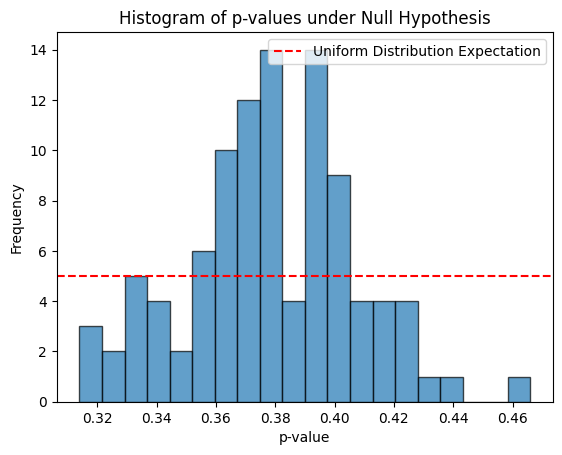

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simulated data under H0
def generate_data_under_H0(n_samples):
    U = np.random.randn(n_samples)  # Latent variable U
    X = 2 * U + np.random.randn(n_samples)  # X depends on U
    W = -2 * U + np.random.randn(n_samples)  # W as a proxy for U
    Y = U + np.random.randn(n_samples)      # Y depends on U
    return X.reshape(-1, 1), Y, W.reshape(-1, 1)

# Simple RBF kernel function
def rbf_kernel(X1, X2, sigma=1.0):
    sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * X1 @ X2.T
    return np.exp(-sq_dists / (2 * sigma**2))

# Placeholder for estimate_H (with fix for singular matrix)
def estimate_H(X, W, Y, lambda_val=0.01):
    K_X = rbf_kernel(X, X)
    K_W = rbf_kernel(W, W)
    n_samples = len(X)
    # Matrix to invert
    matrix = K_W @ K_X @ K_W + lambda_val * n_samples**2 * K_W
    # Use pseudo-inverse instead of solve
    alpha = np.linalg.pinv(matrix) @ (K_W @ K_X @ Y)
    return alpha

# Placeholder for compute_Delta_phi_m
def compute_Delta_phi_m(X, Y, W):
    alpha = estimate_H(X, W, Y, lambda_val=0.01)  # Add regularization
    # Simplified Delta computation (adjust as needed)
    K_W = rbf_kernel(W, W)
    U_est = K_W @ alpha
    Delta = np.mean((Y - U_est)**2)  # Example metric
    return Delta

# Bootstrap p-value computation
def bootstrap_p_value(X, Y, W, n_bootstraps=1000):
    Delta_obs = compute_Delta_phi_m(X, Y, W)
    bootstrap_Deltas = []
    n_samples = len(X)
    for _ in range(n_bootstraps):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        X_boot = X[indices]
        Y_boot = Y[indices]
        W_boot = W[indices]
        Delta_boot = compute_Delta_phi_m(X_boot, Y_boot, W_boot)
        bootstrap_Deltas.append(Delta_boot)
    p_value = np.mean([1 if Delta_boot >= Delta_obs else 0 for Delta_boot in bootstrap_Deltas])
    return p_value

# Main execution
if __name__ == "__main__":
    n_simulations = 100  # Number of simulations
    n_samples = 100      # Sample size per simulation
    p_values = []

    # Run simulations to collect p-values
    for _ in range(n_simulations):
        X, Y, W = generate_data_under_H0(n_samples)
        p_value = bootstrap_p_value(X, Y, W)
        p_values.append(p_value)

    # Visualize p-value distribution
    plt.hist(p_values, bins=20, edgecolor='black', alpha=0.7)
    plt.title('Histogram of p-values under Null Hypothesis')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.axhline(y=n_simulations/20, color='r', linestyle='--', label='Uniform Distribution Expectation')
    plt.legend()
    plt.show()